# Lab 1

In [ ]:
#| code-fold: true
import statsmodels.api as sm
import plotnine as p9
import pandas as pd
from plotnine import * 


df = pd.read_csv("Lab 1 Data/q1data.csv")

---
title: "My Report"
format:
  html:
    embed-resources: true
---


## Task 1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


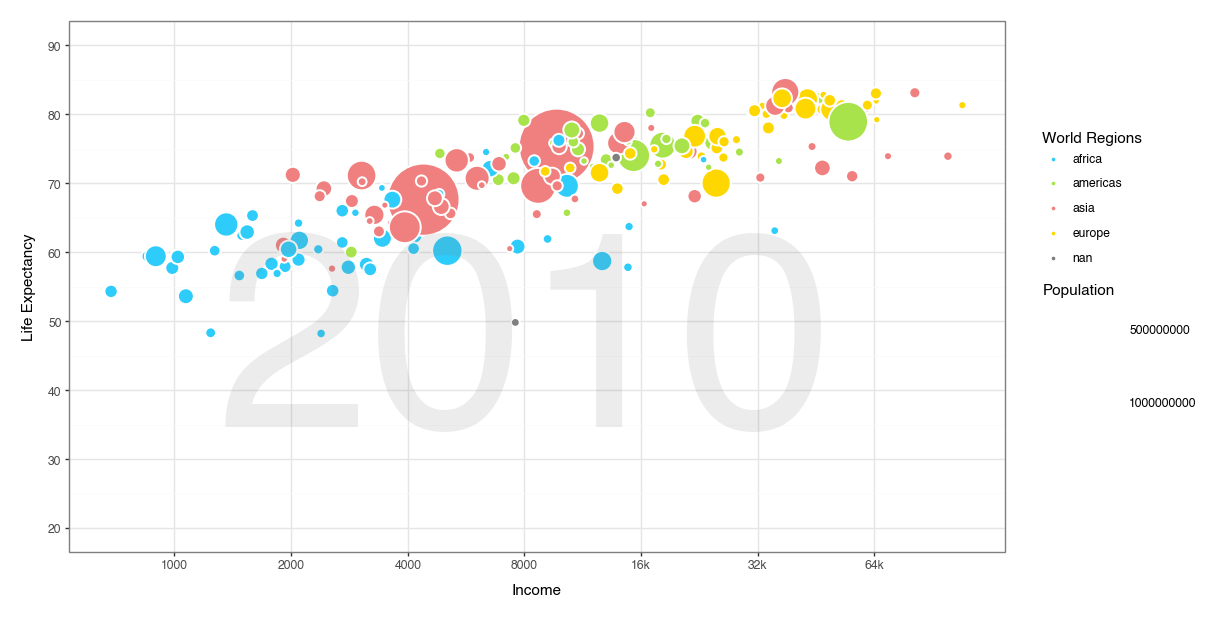

In [161]:
#| code-fold: true
gap_colors = {
    "africa":   "#2ECCFA",  # cyan
    "americas": "#A9E34B",  # lime green
    "asia":     "#F08080",  # pink/red
    "europe":   "#FFD700"   # yellow
}

(
    ggplot(df, aes(x="income", y="life_exp", size="population"))
    + geom_point(aes(fill="four_regions"), stroke=0.8, alpha=1, color="white")
    + scale_fill_manual(values=gap_colors, name="World Regions")
    + scale_size_continuous(range=[2, 30], name="Population")  
    + scale_x_continuous(
        trans="log2",
        breaks=[512, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels=["512", "1000", "2000", "4000", "8000", "16k", "32k", "64k"]
    )
    + scale_y_continuous(limits=[20, 90], breaks=range(20, 91, 10))
    + labs(
        x="Income",
        y="Life Expectancy"
    )
    + theme_bw()
    + theme(figure_size=(12,6))
    + annotate(
        "text",
        x=8000,
        y=45,
        label="2010",
        size=200,
        alpha=0.15,
        color="gray"
    
    )
)


##### Part 4:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


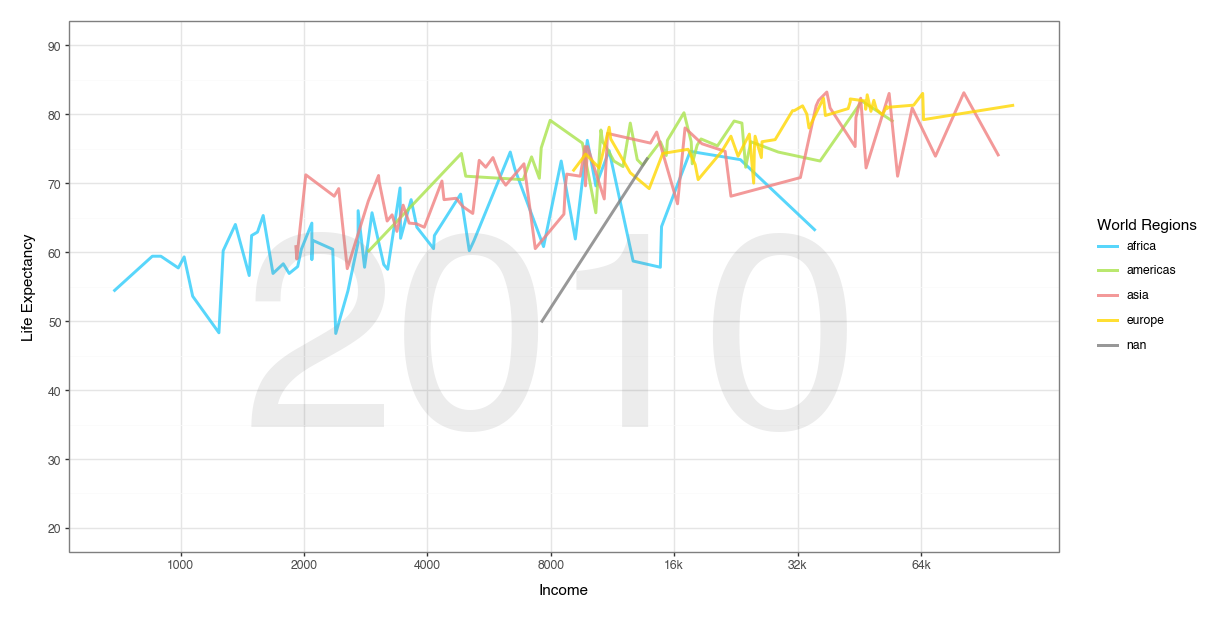

In [155]:
#| code-fold: true
gap_colors = {
    "africa":   "#2ECCFA",  # cyan
    "americas": "#A9E34B",  # lime green
    "asia":     "#F08080",  # pink/red
    "europe":   "#FFD700"   # yellow
}

(
    ggplot(df, aes(x="income", y="life_exp", group="four_regions", color="four_regions"))
    + geom_line(size=1.2, alpha=0.8)
    + scale_color_manual(values=gap_colors, name="World Regions")
    + scale_x_continuous(
        trans="log2",
        breaks=[512, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels=["512", "1000", "2000", "4000", "8000", "16k", "32k", "64k"]
    )
    + scale_y_continuous(limits=[20, 90], breaks=range(20, 91, 10))
    + labs(
        x="Income",
        y="Life Expectancy"
    )
    + theme_bw()
    + theme(figure_size=(12,6))
    + annotate(
        "text",
        x=8000,
        y=45,
        label="2010",
        size=200,
        alpha=0.15,
        color="gray"
    )
)


###### Pros:
Shows a trend or average relationship of life_exp vs income for each region.
Makes it easier to compare general shapes between regions.

###### Cons:
The data is individual countries in a single year, not a continuous time series.
Connecting them with lines suggests an ordering that doesn’t exist

## Task 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 91 rows containing missing values.


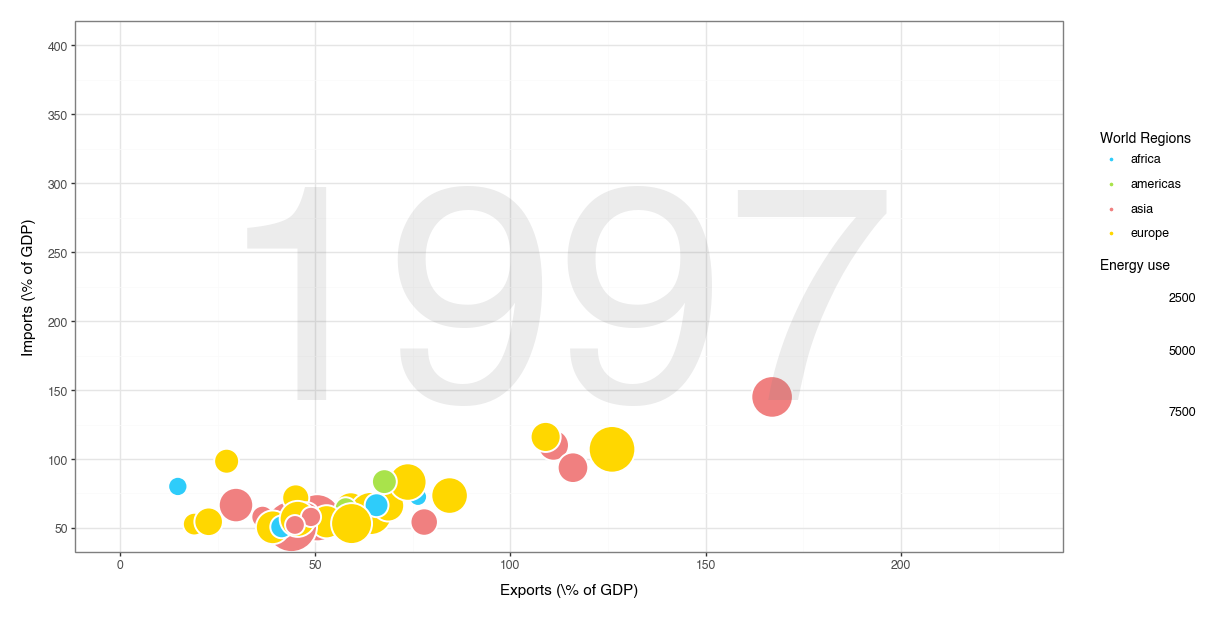

In [156]:
#| code-fold: true
df2 = pd.read_csv("Lab 1 Data/q2data.csv").dropna()
df2["energy"] = pd.to_numeric(df2["energy"], errors="coerce")

gap_colors = {
    "africa":   "#2ECCFA",  # cyan
    "americas": "#A9E34B",  # lime green
    "asia":     "#F08080",  # salmon pink/red
    "europe":   "#FFD700"   # yellow
}

(
    ggplot(df2, aes(x="exports", y="imports", size="energy"))
    + geom_point(aes(fill="four_regions"), alpha=1, color="white", stroke=0.8)
    + scale_fill_manual(values=gap_colors, name="World Regions")
    + scale_size_continuous(range=[5, 20], name="Energy use")
    + scale_x_continuous(limits=[0, 230])
    + scale_y_continuous(
        limits=[50, 400],
        breaks=list(range(50, 401, 50)),
        minor_breaks=list(range(75, 401, 25)))
    + labs(
        x="Exports (\% of GDP)",
        y="Imports (\% of GDP)"
    )
    + theme_bw()
    + theme(
        figure_size=(12, 6),
        legend_title=element_text(size=10, weight="bold"),
        legend_text=element_text(size=9)
    )
    + annotate(
        "text",
        x=112, 
        y=200,  
        label="1997",
        size=220,  
        alpha=0.15, 
        color="gray"
    )
)


##### Part 4:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_tile : Removed 90 rows containing missing values.


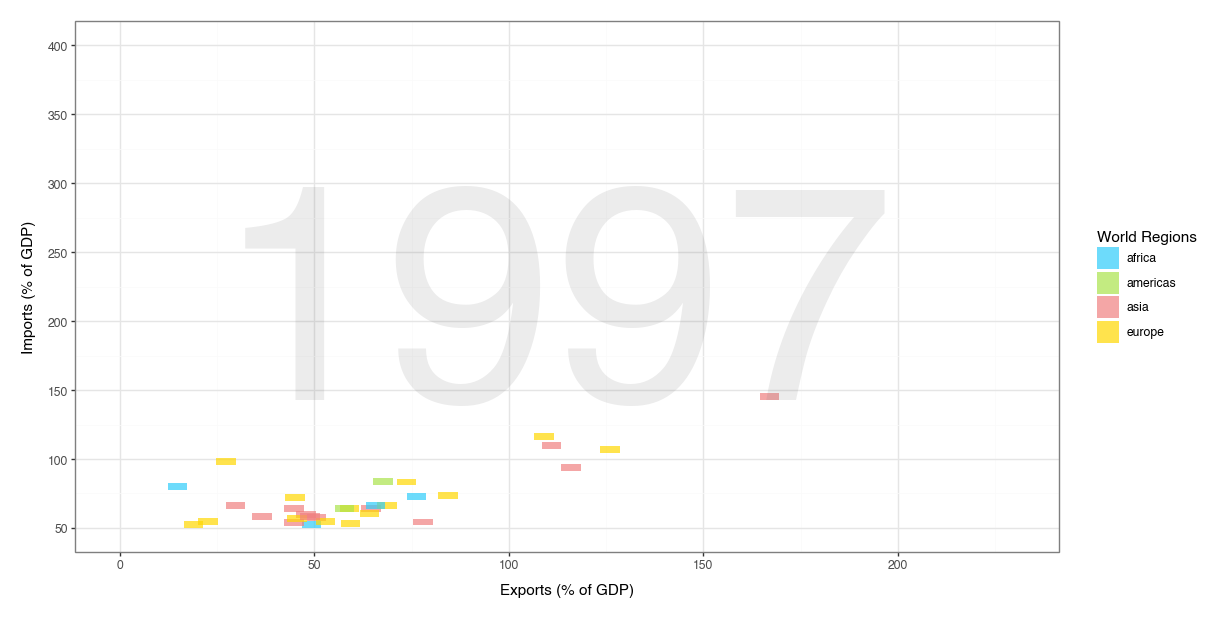

In [157]:
#| code-fold: true
(
    ggplot(df2, aes(x="exports", y="imports", fill="four_regions"))
    + geom_tile(aes(width=5, height=5), alpha=0.7)
    + scale_fill_manual(values=gap_colors, name="World Regions")
    + scale_x_continuous(limits=[0, 230])
    + scale_y_continuous(
        limits=[50, 400],
        breaks=list(range(50, 401, 50)),
        minor_breaks=list(range(75, 401, 25))
    )
    + labs(
        x="Exports (% of GDP)",
        y="Imports (% of GDP)"
    )
    + theme_bw()
    + theme(figure_size=(12, 6))
    + annotate("text", x=112, y=200, label="1997", size=220, alpha=0.15, color="gray")
)


###### Pros:
Geom_tile highlights density of values if you bin widths/heights are chosen carefully.
Can be effective if there are many overlapping points.

###### Cons:
Loses the continuous sense of each observation.
Harder to interpret “energy use” as size
Scatter is clearer for relationships.

## Task 3

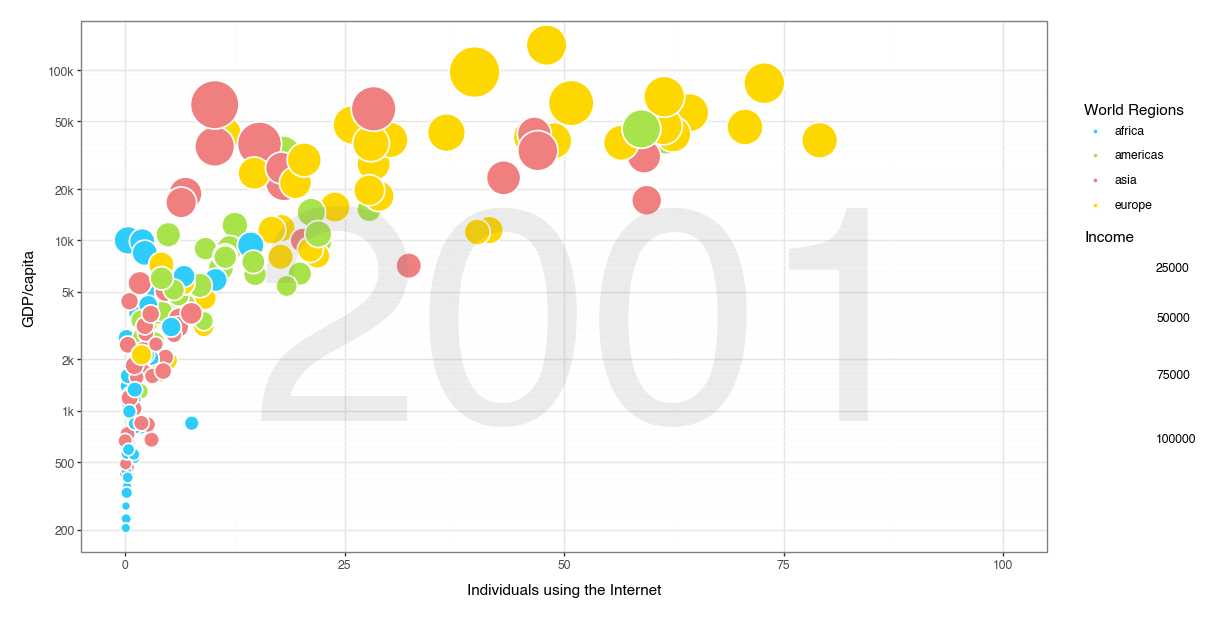

In [158]:
#| code-fold: true
df3 = pd.read_csv("Lab 1 Data/q3data.csv")
df3_clean = df3.dropna(subset=["internet_users", "gdp", "income", "four_regions"])

gap_colors = {
    "africa":   "#2ECCFA",  # light blue
    "americas": "#A9E34B",  # light green
    "asia":     "#F08080",  # pink/red
    "europe":   "#FFD700"   # yellow
}

(
    ggplot(df3_clean, aes(x="internet_users", y="gdp", size="income"))
    + geom_point(aes(fill="four_regions"), alpha=1, color="white", stroke=0.7)
    + scale_fill_manual(values=gap_colors, name="World Regions")
    + scale_size_continuous(range=[3, 20], name="Income")  # match bubble size
    + scale_x_continuous(limits=[0, 100])
    + scale_y_log10(
        breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
        labels=["200", "500", "1k", "2k", "5k", "10k", "20k", "50k", "100k"]
    )
    + labs(
        x="Individuals using the Internet",
        y="GDP/capita"
    )
    + theme_bw()
    + theme(figure_size=(12, 6))
    + annotate(
        "text",
        x=53,
        y=2500,
        label="2001",
        size=220,
        alpha=0.15,
        color="gray"
    )
)




##### Part 4:

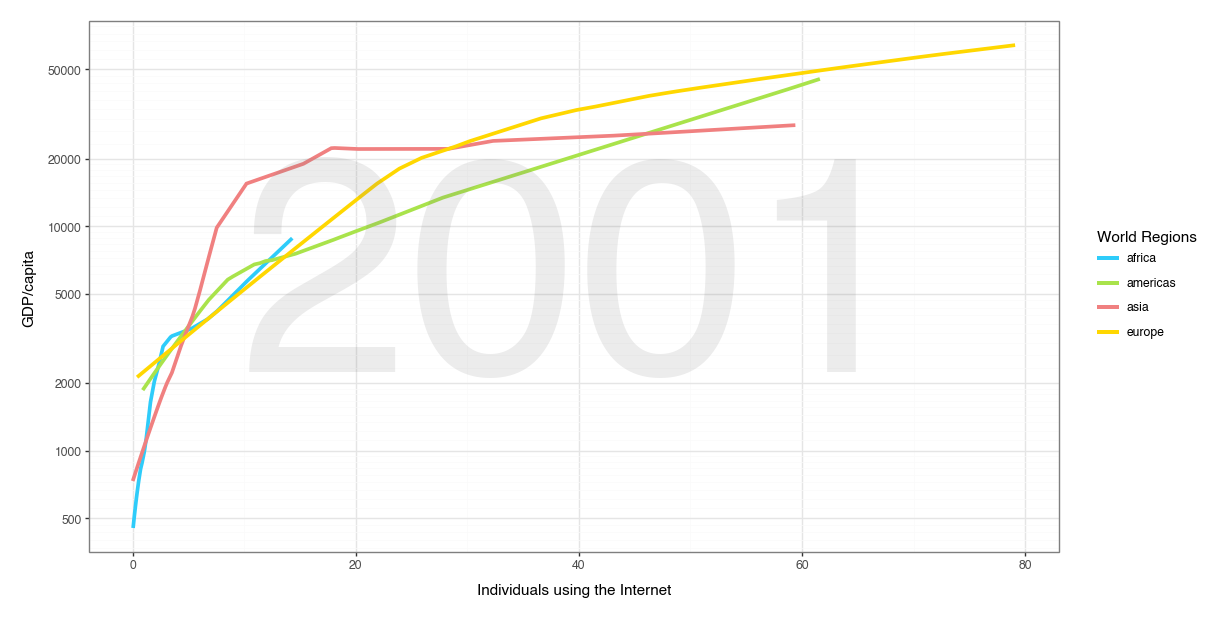

In [159]:
#| code-fold: true
df3 = pd.read_csv("Lab 1 Data/q3data.csv")
df3_clean = df3.dropna(subset=["internet_users", "gdp", "income", "four_regions"])

gap_colors = {
    "africa":   "#2ECCFA",  # cyan
    "americas": "#A9E34B",  # lime green
    "asia":     "#F08080",  # salmon pink/red
    "europe":   "#FFD700"   # yellow
}

(
    ggplot(df3_clean, aes(x="internet_users", y="gdp", color="four_regions"))
    + geom_smooth(se=False, size=1.5)  # trend lines
    + scale_color_manual(values=gap_colors, name="World Regions")
    + scale_y_log10(
        breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]  # just breaks
        # remove labels OR make sure labels has 9 entries
    )
    + labs(
        x="Individuals using the Internet",
        y="GDP/capita"
    )
    + theme_bw()
    + theme(figure_size=(12, 6))
    + annotate(
        "text",
        x=40,
        y=5000,
        label="2001",
        size=220,
        alpha=0.15,
        color="gray"
    )
)


###### Pros:
Shows the overall trend of how GDP scales with internet use across regions.
Much less cluttered than hundreds of bubbles.
Makes regional comparisons easy.

###### Cons:
Hides individual countries so there is no sense of population size or income variation.
Trend line may oversimplify outliers.